# Exporation & cleaning dataset

In this notebook we are going to analyze all the possible datasets that will then be merged to be used as a knowledge base for information on "outpatient facilities"(prestazioni ambulatoriali)  and services.

We are going to clean and format each dataset, and then merge them

In [76]:
pip  install --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the 'c:\Users\Simone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
pd.set_option('display.max_rows', None)

In [79]:
#Let's create a function to better analyze, unique values, null values and duplicates
def contatore(dataset):
    """
    Count the number of duplicates, null values, and unique values for each column in a dataset.
    
    :param dataset: The dataset to be analyzed (pandas DataFrame).
    :return: A dictionary containing the results for each column.
    """
    risultati = {}
    for colonna in dataset.columns:
        duplicati = dataset.duplicated(subset=colonna).sum()
        nulli = dataset[colonna].isnull().sum()
        unici = dataset[colonna].nunique()
        risultati[colonna] = {
            'duplicates:': duplicati,
            'null values': nulli,
            'unique values ': unici
        }
    return risultati

## Prestazioni ambulatoriali Lombardia

The dataset refers to all facilities in Lombardy that can perform outpatient services.

Reference link: https://www.dati.lombardia.it/Sanit-/Prestazioni-Ambulatoriali/d4mg-9zw3

Columns description https://github.com/SimoneFarallo/public_and_social_services/blob/main/dataset/prest_amb_documentation.pdf


In [80]:
prest_amb = pd.read_csv('https://raw.githubusercontent.com/SimoneFarallo/public_and_social_services/main/data/prest_amb.csv')
prest_amb.head()

,ANNO_RIF,COD_ASL,ASL,COD_ENTE,ENTE,COD_STRUT,STRUT,TIPO_RAP_SSN,INDIRIZZO,COMUNE_STRUT,...,TIPO_PREST,ATTIVITA,COD_BRANCA_MINSLE,BRANCA_MINSLE,COD_BRANCA_REGLE,BRANCA_REGLE,COD_PREST_AMBLE,PREST_AMBLE,TARIFFA_PREST_EURO,N_PREST
0,2020,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,705,ASST OVEST MILANESE,2340,POLIAMBULATORIALE PARABIAGO,PUBBLICO ACCREDITATO,VIA XI FEBBRAIO N. 31,PARABIAGO,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",112,CHIMICA CLINICA,90115,CALCITONINA,N.T.,17,260.1
1,2020,323,ATS DELLA MONTAGNA,713,ASST DELLA VALTELLINA E DELL'ALTO LARIO,2941,POLIAMBULATORIO OSP. MORBEGNO,PUBBLICO ACCREDITATO,VIA MORELLI 1,MORBEGNO,...,ATT. CLINICA,19,ORTOPEDIA E TRAUMATOLOGIA,191,ORTOPEDIA E TRAUMATOLOGIA,9346,ALTRE TRAZIONI CUTANEE DEGLI ARTI,N.T.,14,162.4
2,2020,327,ATS DELLA VAL PADANA,724,ASST DI CREMONA,3397,POLIAMB. A.O.IST.OSPIT.CREMONA,PUBBLICO ACCREDITATO,VIA LARGO PRIORI N.1,CREMONA,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",114,MICROBIOLOGIA-VIROLOGIA,91085,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,N.T.,453,2627.4
3,2020,328,ATS DI PAVIA,938,FOND. CLINICA DEL LAVORO - PAVIA,2112,POLIAMB. IRCCS MAUGERI,PRIVATO ACCREDITATO,"VIA MAUGERI, 10",PAVIA,...,ATT. CLINICA,22,PNEUMOLOGIA,221,PNEUMOLOGIA,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,N.T.,56,532.0
4,2020,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,707,ASST NORD MILANO,30058,OSPEDALE BASSINI - CINISELLO BALSAMO,PUBBLICO ACCREDITATO,VIA GORKI 50,CINISELLO BALSAMO,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",114,MICROBIOLOGIA-VIROLOGIA,90557,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,N.T.,2,40.0


In [81]:
prest_amb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160891 entries, 0 to 160890
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ANNO_RIF            160891 non-null  int64  
 1   COD_ASL             160891 non-null  int64  
 2   ASL                 160891 non-null  object 
 3   COD_ENTE            160891 non-null  int64  
 4   ENTE                160891 non-null  object 
 5   COD_STRUT           160891 non-null  int64  
 6   STRUT               160891 non-null  object 
 7   TIPO_RAP_SSN        160891 non-null  object 
 8   INDIRIZZO           160891 non-null  object 
 9   COMUNE_STRUT        160891 non-null  object 
 10  PROV_STRUT          160891 non-null  object 
 11  NUM_TEL             160891 non-null  object 
 12  TIPO_PREST          160891 non-null  object 
 13  ATTIVITA            160891 non-null  int64  
 14  COD_BRANCA_MINSLE   160891 non-null  object 
 15  BRANCA_MINSLE       160891 non-nul

In [82]:
contatore(prest_amb)

{'ANNO_RIF': {'duplicates:': 160890, 'null values': 0, 'unique values ': 1},
 'COD_ASL': {'duplicates:': 160883, 'null values': 0, 'unique values ': 8},
 'ASL': {'duplicates:': 160883, 'null values': 0, 'unique values ': 8},
 'COD_ENTE': {'duplicates:': 160830, 'null values': 0, 'unique values ': 61},
 'ENTE': {'duplicates:': 160830, 'null values': 0, 'unique values ': 61},
 'COD_STRUT': {'duplicates:': 159790,
  'null values': 0,
  'unique values ': 1101},
 'STRUT': {'duplicates:': 159827, 'null values': 0, 'unique values ': 1064},
 'TIPO_RAP_SSN': {'duplicates:': 160889,
  'null values': 0,
  'unique values ': 2},
 'INDIRIZZO': {'duplicates:': 159935, 'null values': 0, 'unique values ': 956},
 'COMUNE_STRUT': {'duplicates:': 160618,
  'null values': 0,
  'unique values ': 273},
 'PROV_STRUT': {'duplicates:': 160879, 'null values': 0, 'unique values ': 12},
 'NUM_TEL': {'duplicates:': 160887, 'null values': 0, 'unique values ': 4},
 'TIPO_PREST': {'duplicates:': 160888, 'null values':

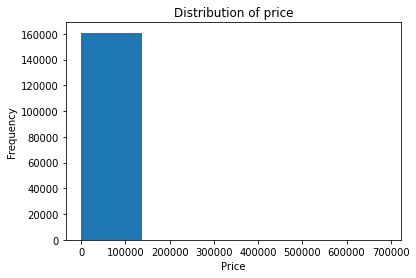

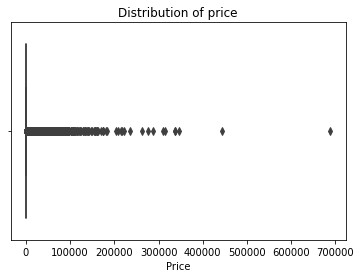

In [83]:
##Analyze price column
plt.hist(prest_amb['TARIFFA_PREST_EURO'], bins=5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of price')
plt.show()



sns.boxplot(x=prest_amb['TARIFFA_PREST_EURO'])
plt.xlabel('Price')
plt.title('Distribution of price')
plt.show()

The information regarding the price is unclear, the documentation does not help us and we are unable to inetrpret the values, we decide not to use this information, but to look for another price list

In [84]:
#Let's take only the columns that might be useful.
prest_amb = prest_amb[['COD_PREST_AMBLE','BRANCA_REGLE','COD_BRANCA_MINSLE','COD_BRANCA_REGLE','TIPO_PREST','STRUT','COD_STRUT','INDIRIZZO','COMUNE_STRUT','PROV_STRUT','COD_ASL','ASL','ENTE',]]
prest_amb.head()

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,COD_ASL,ASL,ENTE
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST OVEST MILANESE
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,323,ATS DELLA MONTAGNA,ASST DELLA VALTELLINA E DELL'ALTO LARIO
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,327,ATS DELLA VAL PADANA,ASST DI CREMONA
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,328,ATS DI PAVIA,FOND. CLINICA DEL LAVORO - PAVIA
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST NORD MILANO


## Strutture accreditate

This dataset refers to the list of accredited healthcare facilities in Lombardy.

Accredited facilities are defined as: An accredited facility is a private facility that has, however, entered into an agreement with the National Health System (NHS), and therefore provides health services by asking the citizen to pay only the co-payment.

Reference link: https://www.regione.lombardia.it/wps/portal/istituzionale/HP/DettaglioServizio/servizi-e-informazioni/Cittadini/salute-e-prevenzione/strutture-sanitarie-e-sociosanitarie/strutture-sanitarie-accreditate/strutture-sanitarie-accreditate

There is no documentation regarding the columns.

In [85]:
strut_accr = pd.read_excel('https://github.com/SimoneFarallo/public_and_social_services/raw/main/data/elenco_strutture_sanitare.xlsx',skiprows = 2)
strut_accr.head()

,Ente,Sede Legale: Indirizzo,Provincia,Sede Legale: Località,Tipo Struttura,Codice Struttura,Denominazione Struttura,Indirizzo,Provincia,Località,CAP,TEL,FAX,ATS,Privata,Abilitata a Cert. Sportiva,Numero Registro Regionale
0,A.D.C. POLIMEDICA SRL,VIA SANT'ANNA 8,MB,BESANA IN BRIANZA,Struttura ambulatoriale,35601,A.D.C. POLIMEDICA SRL,VIA SANT'ANNA 8,MB,BESANA IN BRIANZA,20842,0362995519,0362977412,ATS DELLA BRIANZA,Sì,,616
1,ALLIANCE MEDICAL DIAGNOSTIC SRL,VIA MAMELI 42/A,MB,LISSONE,Struttura ambulatoriale,998,ALLIANCE MEDICAL DIAGNOSTIC - CENTRO RADIOLOG...,VIA G. MAMELI 42/A,MB,LISSONE,20851,0392454279,0392457250,ATS DELLA BRIANZA,Sì,,1277
2,ALLIANCE MEDICAL DIAGNOSTIC SRL,VIA MAMELI 42/A,MB,LISSONE,Struttura ambulatoriale,1026,ALLIANCE MEDICAL DIAGNOSTIC SRL,VIA LOCATELLI 17,MB,CESANO MADERNO,20811,0362521714,NaN,ATS DELLA BRIANZA,Sì,,1277
3,AMBULATORIO ORTOPEDICO FISIOTERAPICO SRL,VIA ORTIGARA N. 1 ANG. VIA MILANO,MB,VIMERCATE,Struttura ambulatoriale,1028,AMBULATORIO ORTOPEDICO FISIOTERAPICO S.R.L.,VIA ORTIGARA N. 1 ANG. VIA MILANO 1,MB,VIMERCATE,20871,039660834,NaN,ATS DELLA BRIANZA,Sì,,1063
4,ANTROPOS SRL,VIA ITALIA 50,MB,MONZA,Struttura psichiatrica,19574,ANTROPOS,VIA PER AGUEGLIO 24,LC,ESINO LARIO,23825,0341860554,0341860554,ATS DELLA BRIANZA,Sì,,777


In [86]:
strut_accr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0    Ente                       1026 non-null   object
 1   Sede Legale: Indirizzo      1026 non-null   object
 2   Provincia                   1023 non-null   object
 3   Sede Legale: Località       1026 non-null   object
 4   Tipo Struttura              1026 non-null   object
 5   Codice Struttura            1026 non-null   int64 
 6   Denominazione Struttura     1026 non-null   object
 7   Indirizzo                   1026 non-null   object
 8   Provincia                   1026 non-null   object
 9   Località                    1026 non-null   object
 10  CAP                         1026 non-null   int64 
 11  TEL                         885 non-null    object
 12  FAX                         722 non-null    object
 13   ATS                        1026 non-null   obje

In [87]:
contatore(strut_accr)

{' Ente': {'duplicates:': 516, 'null values': 0, 'unique values ': 510},
 'Sede Legale: Indirizzo': {'duplicates:': 522,
  'null values': 0,
  'unique values ': 504},
 'Provincia': {'duplicates:': 1002, 'null values': 3, 'unique values ': 23},
 'Sede Legale: Località': {'duplicates:': 833,
  'null values': 0,
  'unique values ': 193},
 'Tipo Struttura': {'duplicates:': 1017,
  'null values': 0,
  'unique values ': 9},
 'Codice Struttura': {'duplicates:': 0,
  'null values': 0,
  'unique values ': 1026},
 'Denominazione Struttura': {'duplicates:': 20,
  'null values': 0,
  'unique values ': 1006},
 'Indirizzo ': {'duplicates:': 62, 'null values': 0, 'unique values ': 964},
 'Provincia ': {'duplicates:': 1014, 'null values': 0, 'unique values ': 12},
 'Località  ': {'duplicates:': 673, 'null values': 0, 'unique values ': 353},
 'CAP ': {'duplicates:': 720, 'null values': 0, 'unique values ': 306},
 'TEL': {'duplicates:': 225, 'null values': 141, 'unique values ': 800},
 'FAX': {'duplicat

In [88]:
#Let's take only the columns that might be useful.
strut_accr = strut_accr[['Codice Struttura',' Ente','Tipo Struttura','TEL','FAX','Privata']]
strut_accr.head()

,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata
0,35601,A.D.C. POLIMEDICA SRL,Struttura ambulatoriale,0362995519,0362977412,Sì
1,998,ALLIANCE MEDICAL DIAGNOSTIC SRL,Struttura ambulatoriale,0392454279,0392457250,Sì
2,1026,ALLIANCE MEDICAL DIAGNOSTIC SRL,Struttura ambulatoriale,0362521714,NaN,Sì
3,1028,AMBULATORIO ORTOPEDICO FISIOTERAPICO SRL,Struttura ambulatoriale,039660834,NaN,Sì
4,19574,ANTROPOS SRL,Struttura psichiatrica,0341860554,0341860554,Sì


## Transcodifica codice e nomenclatura

This dataset refers to performance codes, plus there are small descriptions for each type of performance; 
It is used by the Lombardy region to code outpatient benefit codes from other regions.

The two datasets will refer to the nomenclature of outpatient specialty analysis, the difference between the two datasets is that the former refers to the SISS/SAR.
The SISS/SAR provides the services to support the prescription of dematerialized electronic prescriptions by ensuring synchronous transmission with MEF's SAC system and applying the appropriate controls to ensure the formal and content correctness of prescriptions. The dematerialized prescription in the prescription and dispensing stages is based solely on the electronic data available on the SISS and the Central Acceptance System (SAC) of the Ministry of Economy and Finance (MEF).

Taking into consideration the following reference:

 https://www.lavoro.gov.it/strumenti-e-servizi/Sistema-informativo-servizi-sociali/Pagine/default.aspx.
 
 So we keep in consideration the first dataset obtained.

Link reference: https://www.dati.lombardia.it/Sanit-/Transcodifica-Codici-prestazioni/7ugz-vcug.

There is no documentation regarding the columns.

In [89]:
xls = pd.ExcelFile('https://github.com/SimoneFarallo/public_and_social_services/raw/main/data/Transcodifica_codici.xlsx')
cod_SIIS = pd.read_excel(xls, 'Tabella complessiva cod SISS', skiprows = 1)
set_rif = pd.read_excel(xls, 'Tabella sole prestaz per set', skiprows = 1)

In [90]:
cod_SIIS.head()

,TIPO_PRESTAZ,PRESTAZIONE_ID,CD_NOMENCLATORE,PRESTAZIONE_DESC,COD_REGIONALE2,PRESTAZ_AMB_DESC,BRANCA_REG_ID,BRANCA_REG_DESC,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZ_AMB_SET_RIFERIMENTO_DESC
0,LABORATORIO,0090011,90.01.1,11 DEOSSICORTISOLO,90011,11 DEOSSICORTISOLO,0112,CHIMICA CLINICA,90011,11 DEOSSICORTISOLO
1,LABORATORIO,0090012,90.01.2,17 ALFA IDROSSIPROGESTERONE (17 OH-P),90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),0112,CHIMICA CLINICA,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,LABORATORIO,0090013,90.01.3,17 CHETOSTEROIDI NELLE URINE 24 H,90013,17 CHETOSTEROIDI [dU],0112,CHIMICA CLINICA,90013,17 CHETOSTEROIDI [dU]
3,LABORATORIO,0090014,90.01.4,17 IDROSSICORTICOIDI NELLE URINE 24 H,90014,17 IDROSSICORTICOIDI [dU],0112,CHIMICA CLINICA,90014,17 IDROSSICORTICOIDI [dU]
4,LABORATORIO,0090352.01,90.35.2,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 ),0112,CHIMICA CLINICA,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


In [91]:
set_rif.head()

,TIPO_PRESTAZ,PRESTAZIONE_ID,CD_NOMENCLATORE,PRESTAZIONE_DESC,COD_REGIONALE2,PRESTAZ_AMB_DESC,BRANCA_REG_ID,BRANCA_REG_DESC,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZ_AMB_SET_RIFERIMENTO_DESC
0,LABORATORIO,0090011,90.01.1,11 DEOSSICORTISOLO,90011,11 DEOSSICORTISOLO,112,CHIMICA CLINICA,90011,11 DEOSSICORTISOLO
1,LABORATORIO,0090012,90.01.2,17 ALFA IDROSSIPROGESTERONE (17 OH-P),90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),112,CHIMICA CLINICA,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,LABORATORIO,0090013,90.01.3,17 CHETOSTEROIDI NELLE URINE 24 H,90013,17 CHETOSTEROIDI [dU],112,CHIMICA CLINICA,90013,17 CHETOSTEROIDI [dU]
3,LABORATORIO,0090014,90.01.4,17 IDROSSICORTICOIDI NELLE URINE 24 H,90014,17 IDROSSICORTICOIDI [dU],112,CHIMICA CLINICA,90014,17 IDROSSICORTICOIDI [dU]
4,LABORATORIO,0090352.01,90.35.2,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 ),112,CHIMICA CLINICA,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


In [92]:
contatore(cod_SIIS)

{'TIPO_PRESTAZ': {'duplicates:': 2820, 'null values': 0, 'unique values ': 2},
 'PRESTAZIONE_ID': {'duplicates:': 0,
  'null values': 0,
  'unique values ': 2822},
 'CD_NOMENCLATORE': {'duplicates:': 646,
  'null values': 0,
  'unique values ': 2176},
 'PRESTAZIONE_DESC': {'duplicates:': 0,
  'null values': 0,
  'unique values ': 2822},
 'COD_REGIONALE2': {'duplicates:': 664,
  'null values': 0,
  'unique values ': 2158},
 'PRESTAZ_AMB_DESC': {'duplicates:': 714,
  'null values': 0,
  'unique values ': 2108},
 'BRANCA_REG_ID': {'duplicates:': 2775,
  'null values': 0,
  'unique values ': 47},
 'BRANCA_REG_DESC': {'duplicates:': 2774,
  'null values': 0,
  'unique values ': 48},
 'PRESTAZ_AMB_SET_RIFERIMENTO_ID': {'duplicates:': 703,
  'null values': 0,
  'unique values ': 2119},
 'PRESTAZ_AMB_SET_RIFERIMENTO_DESC': {'duplicates:': 787,
  'null values': 0,
  'unique values ': 2035}}

In [93]:
cod_SIIS.head()

,TIPO_PRESTAZ,PRESTAZIONE_ID,CD_NOMENCLATORE,PRESTAZIONE_DESC,COD_REGIONALE2,PRESTAZ_AMB_DESC,BRANCA_REG_ID,BRANCA_REG_DESC,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZ_AMB_SET_RIFERIMENTO_DESC
0,LABORATORIO,0090011,90.01.1,11 DEOSSICORTISOLO,90011,11 DEOSSICORTISOLO,0112,CHIMICA CLINICA,90011,11 DEOSSICORTISOLO
1,LABORATORIO,0090012,90.01.2,17 ALFA IDROSSIPROGESTERONE (17 OH-P),90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),0112,CHIMICA CLINICA,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,LABORATORIO,0090013,90.01.3,17 CHETOSTEROIDI NELLE URINE 24 H,90013,17 CHETOSTEROIDI [dU],0112,CHIMICA CLINICA,90013,17 CHETOSTEROIDI [dU]
3,LABORATORIO,0090014,90.01.4,17 IDROSSICORTICOIDI NELLE URINE 24 H,90014,17 IDROSSICORTICOIDI [dU],0112,CHIMICA CLINICA,90014,17 IDROSSICORTICOIDI [dU]
4,LABORATORIO,0090352.01,90.35.2,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 ),0112,CHIMICA CLINICA,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


In [94]:
#Let's take only the columns that might be useful.
cod_SIIS = cod_SIIS[['PRESTAZ_AMB_SET_RIFERIMENTO_ID','PRESTAZIONE_DESC','PRESTAZ_AMB_DESC']]
cod_SIIS.head()


,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZIONE_DESC,PRESTAZ_AMB_DESC
0,90011,11 DEOSSICORTISOLO,11 DEOSSICORTISOLO
1,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,90013,17 CHETOSTEROIDI NELLE URINE 24 H,17 CHETOSTEROIDI [dU]
3,90014,17 IDROSSICORTICOIDI NELLE URINE 24 H,17 IDROSSICORTICOIDI [dU]
4,90352,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


This dataset will be used only as a reference, preset names change and may create inconsistencies and inaccuracies

## Nomenclatura e prezzi prestazioni ambulatoriali NAZIONALE

This dataset refers to outpatient services nationwide, various analyses and prices for public facilities are described.
is the only information we were able to obtain at the national level, for more details look at reference links.

Link reference: https://www.salute.gov.it/portale/temi/p2_6.jsp?id=1767&area=programmazioneSanitariaLea&menu=lea

There is no documentation regarding the columns.


In [95]:
nom_nazionale = pd.read_excel('https://github.com/SimoneFarallo/public_and_social_services/raw/main/data/nomenclatore_specialistica_2013_pw.xlsx', skiprows = 4)
nom_nazionale = nom_nazionale[['CODICE','DESCRIZIONE','Unnamed: 4']]
nom_nazionale = nom_nazionale.rename(columns={'Unnamed: 4': 'PREZZO'})
nom_nazionale.head()

,CODICE,DESCRIZIONE,PREZZO
0,03.8,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,51.65
1,03.91,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.29
2,03.92,INIEZIONE DI ALTRI FARMACI NEL CANALE VERTEBRALE,103.29
3,04.07.1,RESEZIONE O ASPORTAZIONE DEI NERVI PERIFERICI,51.13
4,04.11.1,BIOPSIA [PERCUTANEA][AGOBIOPSIA] DEI NERVI PER...,51.13


In [96]:
contatore(nom_nazionale)

{'CODICE': {'duplicates:': 0, 'null values': 0, 'unique values ': 1702},
 'DESCRIZIONE': {'duplicates:': 46, 'null values': 0, 'unique values ': 1656},
 'PREZZO': {'duplicates:': 1135, 'null values': 0, 'unique values ': 567}}

In [97]:
#Removing dots from the "Values" column.
nom_nazionale['CODICE'] = nom_nazionale['CODICE'].str.replace('.', '')
nom_nazionale.head()

C:\Users\Simone\AppData\Local\Temp\ipykernel_30328\2065109641.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nom_nazionale['CODICE'] = nom_nazionale['CODICE'].str.replace('.', '')


,CODICE,DESCRIZIONE,PREZZO
0,038,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,51.65
1,0391,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.29
2,0392,INIEZIONE DI ALTRI FARMACI NEL CANALE VERTEBRALE,103.29
3,04071,RESEZIONE O ASPORTAZIONE DEI NERVI PERIFERICI,51.13
4,04111,BIOPSIA [PERCUTANEA][AGOBIOPSIA] DEI NERVI PER...,51.13


# Merging dataset

After performing an exploratory analysis and cleaning the individual datasets, we go on to merge the datasets into a single csv file

## Prestazioni + strutture accreditate

In [98]:
merg1 = prest_amb.merge(strut_accr ,how='left', left_on='COD_STRUT', right_on='Codice Struttura')
display(merg1.head(5))

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,COD_ASL,ASL,ENTE,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,323,ATS DELLA MONTAGNA,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,327,ATS DELLA VAL PADANA,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,328,ATS DI PAVIA,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No


In [99]:
contatore(merg1)

{'COD_PREST_AMBLE': {'duplicates:': 158887,
  'null values': 0,
  'unique values ': 2004},
 'BRANCA_REGLE': {'duplicates:': 158845,
  'null values': 0,
  'unique values ': 2046},
 'COD_BRANCA_MINSLE': {'duplicates:': 160864,
  'null values': 0,
  'unique values ': 27},
 'COD_BRANCA_REGLE': {'duplicates:': 160844,
  'null values': 0,
  'unique values ': 47},
 'TIPO_PREST': {'duplicates:': 160888, 'null values': 0, 'unique values ': 3},
 'STRUT': {'duplicates:': 159827, 'null values': 0, 'unique values ': 1064},
 'COD_STRUT': {'duplicates:': 159790,
  'null values': 0,
  'unique values ': 1101},
 'INDIRIZZO': {'duplicates:': 159935, 'null values': 0, 'unique values ': 956},
 'COMUNE_STRUT': {'duplicates:': 160618,
  'null values': 0,
  'unique values ': 273},
 'PROV_STRUT': {'duplicates:': 160879, 'null values': 0, 'unique values ': 12},
 'COD_ASL': {'duplicates:': 160883, 'null values': 0, 'unique values ': 8},
 'ASL': {'duplicates:': 160883, 'null values': 0, 'unique values ': 8},
 'EN

In [100]:
merg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160891 entries, 0 to 160890
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   COD_PREST_AMBLE    160891 non-null  object 
 1   BRANCA_REGLE       160891 non-null  object 
 2   COD_BRANCA_MINSLE  160891 non-null  object 
 3   COD_BRANCA_REGLE   160891 non-null  object 
 4   TIPO_PREST         160891 non-null  object 
 5   STRUT              160891 non-null  object 
 6   COD_STRUT          160891 non-null  int64  
 7   INDIRIZZO          160891 non-null  object 
 8   COMUNE_STRUT       160891 non-null  object 
 9   PROV_STRUT         160891 non-null  object 
 10  COD_ASL            160891 non-null  int64  
 11  ASL                160891 non-null  object 
 12  ENTE               160891 non-null  object 
 13  Codice Struttura   52612 non-null   float64
 14   Ente              52612 non-null   object 
 15  Tipo Struttura     52612 non-null   object 
 16  TE

In [101]:
merg1.columns

Index(['COD_PREST_AMBLE', 'BRANCA_REGLE', 'COD_BRANCA_MINSLE',
       'COD_BRANCA_REGLE', 'TIPO_PREST', 'STRUT', 'COD_STRUT', 'INDIRIZZO',
       'COMUNE_STRUT', 'PROV_STRUT', 'COD_ASL', 'ASL', 'ENTE',
       'Codice Struttura', ' Ente', 'Tipo Struttura', 'TEL', 'FAX', 'Privata'],
      dtype='object')

In [102]:
check_merg1 = merg1[['COD_STRUT','Codice Struttura','STRUT']]
display(check_merg1.head(20))

,COD_STRUT,Codice Struttura,STRUT
0,2340,2340.0,POLIAMBULATORIALE PARABIAGO
1,2941,NaN,POLIAMBULATORIO OSP. MORBEGNO
2,3397,NaN,POLIAMB. A.O.IST.OSPIT.CREMONA
3,2112,NaN,POLIAMB. IRCCS MAUGERI
4,30058,30058.0,OSPEDALE BASSINI - CINISELLO BALSAMO
5,1054,NaN,CLIN ZUCCHI CARATE POLIAMBULAT
6,30035,30035.0,C.O.F. LANZO HOSPITAL - ALTA VALLE INTELVI
7,3079,NaN,POLIAMBULATORIO OSPEDALE SAN GERARDO
8,985,NaN,LABORATORIO ANALISI C.GOLGI
9,30030,30030.0,OSPEDALE VALDUCE


## Prestazioni + strutture accreditate + prezziario nazionale

In [103]:
nom_nazionale.head()

,CODICE,DESCRIZIONE,PREZZO
0,038,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,51.65
1,0391,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.29
2,0392,INIEZIONE DI ALTRI FARMACI NEL CANALE VERTEBRALE,103.29
3,04071,RESEZIONE O ASPORTAZIONE DEI NERVI PERIFERICI,51.13
4,04111,BIOPSIA [PERCUTANEA][AGOBIOPSIA] DEI NERVI PER...,51.13


In [104]:
merg2 = merg1.merge(nom_nazionale ,how='left', left_on='BRANCA_REGLE', right_on='CODICE')
display(merg2.head(5))

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,...,ENTE,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata,CODICE,DESCRIZIONE,PREZZO
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,...,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No,90115,CALCITONINA,14.56
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,...,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN,9346,ALTRE TRAZIONI CUTANEE DEGLI ARTI,11.36
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,...,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN,91085,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,4.85
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,...,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,9.30
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,...,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No,NaN,NaN,NaN


In [105]:
merg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160891 entries, 0 to 160890
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   COD_PREST_AMBLE    160891 non-null  object 
 1   BRANCA_REGLE       160891 non-null  object 
 2   COD_BRANCA_MINSLE  160891 non-null  object 
 3   COD_BRANCA_REGLE   160891 non-null  object 
 4   TIPO_PREST         160891 non-null  object 
 5   STRUT              160891 non-null  object 
 6   COD_STRUT          160891 non-null  int64  
 7   INDIRIZZO          160891 non-null  object 
 8   COMUNE_STRUT       160891 non-null  object 
 9   PROV_STRUT         160891 non-null  object 
 10  COD_ASL            160891 non-null  int64  
 11  ASL                160891 non-null  object 
 12  ENTE               160891 non-null  object 
 13  Codice Struttura   52612 non-null   float64
 14   Ente              52612 non-null   object 
 15  Tipo Struttura     52612 non-null   object 
 16  TE

In [106]:
contatore(merg2)

{'COD_PREST_AMBLE': {'duplicates:': 158887,
  'null values': 0,
  'unique values ': 2004},
 'BRANCA_REGLE': {'duplicates:': 158845,
  'null values': 0,
  'unique values ': 2046},
 'COD_BRANCA_MINSLE': {'duplicates:': 160864,
  'null values': 0,
  'unique values ': 27},
 'COD_BRANCA_REGLE': {'duplicates:': 160844,
  'null values': 0,
  'unique values ': 47},
 'TIPO_PREST': {'duplicates:': 160888, 'null values': 0, 'unique values ': 3},
 'STRUT': {'duplicates:': 159827, 'null values': 0, 'unique values ': 1064},
 'COD_STRUT': {'duplicates:': 159790,
  'null values': 0,
  'unique values ': 1101},
 'INDIRIZZO': {'duplicates:': 159935, 'null values': 0, 'unique values ': 956},
 'COMUNE_STRUT': {'duplicates:': 160618,
  'null values': 0,
  'unique values ': 273},
 'PROV_STRUT': {'duplicates:': 160879, 'null values': 0, 'unique values ': 12},
 'COD_ASL': {'duplicates:': 160883, 'null values': 0, 'unique values ': 8},
 'ASL': {'duplicates:': 160883, 'null values': 0, 'unique values ': 8},
 'EN

All datasets have been merged, a manual check has been done, doing several tests, there should be no inconsistencies, the data is not complete but we can't check this problem with at the documentation at our disposal

# Dataset finale 

At this stage we recheck the final dataset and make a few changes, to make it as clear as possible.

In [107]:
final_data = merg2
final_data.head()

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,...,ENTE,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata,CODICE,DESCRIZIONE,PREZZO
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,...,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No,90115,CALCITONINA,14.56
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,...,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN,9346,ALTRE TRAZIONI CUTANEE DEGLI ARTI,11.36
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,...,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN,91085,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,4.85
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,...,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,9.30
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,...,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No,NaN,NaN,NaN


In [108]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160891 entries, 0 to 160890
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   COD_PREST_AMBLE    160891 non-null  object 
 1   BRANCA_REGLE       160891 non-null  object 
 2   COD_BRANCA_MINSLE  160891 non-null  object 
 3   COD_BRANCA_REGLE   160891 non-null  object 
 4   TIPO_PREST         160891 non-null  object 
 5   STRUT              160891 non-null  object 
 6   COD_STRUT          160891 non-null  int64  
 7   INDIRIZZO          160891 non-null  object 
 8   COMUNE_STRUT       160891 non-null  object 
 9   PROV_STRUT         160891 non-null  object 
 10  COD_ASL            160891 non-null  int64  
 11  ASL                160891 non-null  object 
 12  ENTE               160891 non-null  object 
 13  Codice Struttura   52612 non-null   float64
 14   Ente              52612 non-null   object 
 15  Tipo Struttura     52612 non-null   object 
 16  TE

In [109]:
final_data.columns

Index(['COD_PREST_AMBLE', 'BRANCA_REGLE', 'COD_BRANCA_MINSLE',
       'COD_BRANCA_REGLE', 'TIPO_PREST', 'STRUT', 'COD_STRUT', 'INDIRIZZO',
       'COMUNE_STRUT', 'PROV_STRUT', 'COD_ASL', 'ASL', 'ENTE',
       'Codice Struttura', ' Ente', 'Tipo Struttura', 'TEL', 'FAX', 'Privata',
       'CODICE', 'DESCRIZIONE', 'PREZZO'],
      dtype='object')

In [110]:
#Following the documentation available to us, we change the names of the columns to make them easier for the end user to interpret
final_data = final_data.rename(columns={'COD_PREST_AMBLE': 'Codice prestazione ambulatoriale',
                         'BRANCA_REGLE': 'Codice branca regionale',
                         'COD_BRANCA_MINSLE': 'Codice branca ministeriale',
                         'COD_BRANCA_REGLE': 'Branca regionale',
                         'TIPO_PREST': 'Tipo di prestazione',
                         'STRUT': 'Nome struttura',
                         'COD_STRUT': 'Codice struttura erogante',
                         'INDIRIZZO': 'Indirizzo',
                         'COMUNE_STRUT': 'Comune struttura',
                         'PROV_STRUT': 'Provincia struttura',
                         'COD_ASL': 'Codice ASL territoriale',
                         'ASL': 'Descrizione ASL',
                         'ENTE': 'Ente',
                         'Codice Struttura': 'Codice struttura',
                         'Ente': 'Ente struttura',
                         'Tipo Struttura': 'Tipo struttura',
                         'TEL': 'Telefono',
                         'FAX': 'Fax',
                         'Privata': 'Struttura privata',
                         'PRESTAZ_AMB_SET_RIFERIMENTO_ID': 'ID prestazione ambulatoriale',
                         'PRESTAZ_AMB_DESC': 'Dettagli prestazioni',
                         'COD_PRESTAZ_AMB': 'Codice prestazione ambulatoriale_1',
                         'DESCRIZIONE': 'Descrizione',
                         'PREZZO': 'Prezzo medio'})
final_data.head()

,Codice prestazione ambulatoriale,Codice branca regionale,Codice branca ministeriale,Branca regionale,Tipo di prestazione,Nome struttura,Codice struttura erogante,Indirizzo,Comune struttura,Provincia struttura,...,Ente,Codice struttura,Ente,Tipo struttura,Telefono,Fax,Struttura privata,CODICE,Descrizione,Prezzo medio
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,...,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No,90115,CALCITONINA,14.56
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,...,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN,9346,ALTRE TRAZIONI CUTANEE DEGLI ARTI,11.36
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,...,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN,91085,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,4.85
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,...,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,9.30
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,...,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No,NaN,NaN,NaN


In [111]:
#The dataset will be used as output, so we keep only the columns that may be useful to the end user
final_data = final_data[['Codice prestazione ambulatoriale','Codice branca regionale', 'Branca regionale','Tipo di prestazione','Nome struttura','Comune struttura','Provincia struttura','Indirizzo','Descrizione ASL','Codice struttura','Tipo struttura','Telefono','Fax','Struttura privata','Prezzo medio' ]]
#I change the null values, to make the dataset clearer
final_data = final_data.fillna('Info non disponibile')
final_data.head()


,Codice prestazione ambulatoriale,Codice branca regionale,Branca regionale,Tipo di prestazione,Nome struttura,Comune struttura,Provincia struttura,Indirizzo,Descrizione ASL,Codice struttura,Tipo struttura,Telefono,Fax,Struttura privata,Prezzo medio
0,CALCITONINA,90115,CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,PARABIAGO,MI,VIA XI FEBBRAIO N. 31,ATS DELLA CITTA' METROPOLITANA DI MILANO,2340.0,Struttura ambulatoriale,0331449633,Info non disponibile,No,14.56
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,MORBEGNO,SO,VIA MORELLI 1,ATS DELLA MONTAGNA,Info non disponibile,Info non disponibile,Info non disponibile,Info non disponibile,Info non disponibile,11.36
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,CREMONA,CR,VIA LARGO PRIORI N.1,ATS DELLA VAL PADANA,Info non disponibile,Info non disponibile,Info non disponibile,Info non disponibile,Info non disponibile,4.85
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,PAVIA,PV,"VIA MAUGERI, 10",ATS DI PAVIA,Info non disponibile,Info non disponibile,Info non disponibile,Info non disponibile,Info non disponibile,9.3
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,CINISELLO BALSAMO,MI,VIA GORKI 50,ATS DELLA CITTA' METROPOLITANA DI MILANO,30058.0,Struttura di ricovero e cura,02618311,026127543,No,Info non disponibile


In [112]:
contatore(final_data)

{'Codice prestazione ambulatoriale': {'duplicates:': 158887,
  'null values': 0,
  'unique values ': 2004},
 'Codice branca regionale': {'duplicates:': 158845,
  'null values': 0,
  'unique values ': 2046},
 'Branca regionale': {'duplicates:': 160844,
  'null values': 0,
  'unique values ': 47},
 'Tipo di prestazione': {'duplicates:': 160888,
  'null values': 0,
  'unique values ': 3},
 'Nome struttura': {'duplicates:': 159827,
  'null values': 0,
  'unique values ': 1064},
 'Comune struttura': {'duplicates:': 160618,
  'null values': 0,
  'unique values ': 273},
 'Provincia struttura': {'duplicates:': 160879,
  'null values': 0,
  'unique values ': 12},
 'Indirizzo': {'duplicates:': 159935, 'null values': 0, 'unique values ': 956},
 'Descrizione ASL': {'duplicates:': 160883,
  'null values': 0,
  'unique values ': 8},
 'Codice struttura': {'duplicates:': 160382,
  'null values': 0,
  'unique values ': 509},
 'Tipo struttura': {'duplicates:': 160884,
  'null values': 0,
  'unique value

In [113]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160891 entries, 0 to 160890
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Codice prestazione ambulatoriale  160891 non-null  object
 1   Codice branca regionale           160891 non-null  object
 2   Branca regionale                  160891 non-null  object
 3   Tipo di prestazione               160891 non-null  object
 4   Nome struttura                    160891 non-null  object
 5   Comune struttura                  160891 non-null  object
 6   Provincia struttura               160891 non-null  object
 7   Indirizzo                         160891 non-null  object
 8   Descrizione ASL                   160891 non-null  object
 9   Codice struttura                  160891 non-null  object
 10  Tipo struttura                    160891 non-null  object
 11  Telefono                          160891 non-null  object
 12  Fa

In [114]:
#final_data.to_csv('final_data_cleaned.csv')